In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
subject_labels=[]
for file in (os.listdir("Data/labels/")):
    subject_labels.append(os.path.join("Data/labels/",file))
    subject_labels=sorted(subject_labels)
    
subject_heart_rate=[]
for file in os.listdir("Data/heart_rate"):
    subject_heart_rate.append(os.path.join("Data/heart_rate",file))

subject_steps=[]
for file in os.listdir("Data/steps"):
    subject_steps.append(os.path.join("Data/steps",file))

subject_motion=[]
for file in os.listdir("Data/motion"):
    subject_motion.append(os.path.join("Data/motion",file))

In [3]:
print(len(subject_labels),len(subject_heart_rate),
      len(subject_steps),len(subject_motion))

31 31 31 31


In [4]:
n=10

In [5]:
print('\n',subject_labels[n],'\n',subject_heart_rate[n],'\n',
      subject_steps[n],'\n',subject_motion[n])


 Data/labels/4314139_labeled_sleep.txt 
 Data/heart_rate\4314139_heartrate.txt 
 Data/steps\4314139_steps.txt 
 Data/motion\4314139_acceleration.txt


In [6]:
labels=pd.read_csv(subject_labels[n], delimiter=' ')
labels.columns=["Time","label"]
labels.sample(10)

,Time,label
524,15750,2
401,12060,2
618,18570,2
517,15540,2
895,26880,2
449,13500,5
71,2160,2
146,4410,1
452,13590,5
63,1920,2


The data dimension is: 969 x 2 

Number of different values for Sleep stage: 6 

Number of times each Sleep stage value is taken:
 2    524
 5    163
 0    104
 3     96
 1     74
-1      8
Name: label, dtype: int64 

Statistical descriptors of Sleep stage:
count    969.00
mean       2.29
std        1.45
min       -1.00
25%        2.00
50%        2.00
75%        3.00
max        5.00
Name: label, dtype: float64 

Number of Null values: 0 

Number of NaN values: 0 



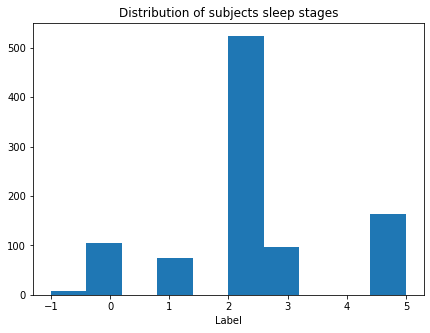

In [7]:
rows, columns = labels.shape
print ('The data dimension is:', rows,'x',columns,'\n')
print('Number of different values for Sleep stage:',labels['label'].nunique(),'\n')
print('Number of times each Sleep stage value is taken:')
print(labels["label"].value_counts(),'\n')
print('Statistical descriptors of Sleep stage:')
print(labels["label"].describe().round(2),'\n')
print('Number of Null values:',labels["label"].isnull().sum(),'\n')
print('Number of NaN values:',labels["label"].isna().sum(),'\n')

plt.figure(figsize=(7, 5))
plt.title('Distribution of subjects sleep stages')
plt.xlabel("Label")
plt.hist(labels['label'])
plt.savefig('Image/label_histogram.png')
plt.show()

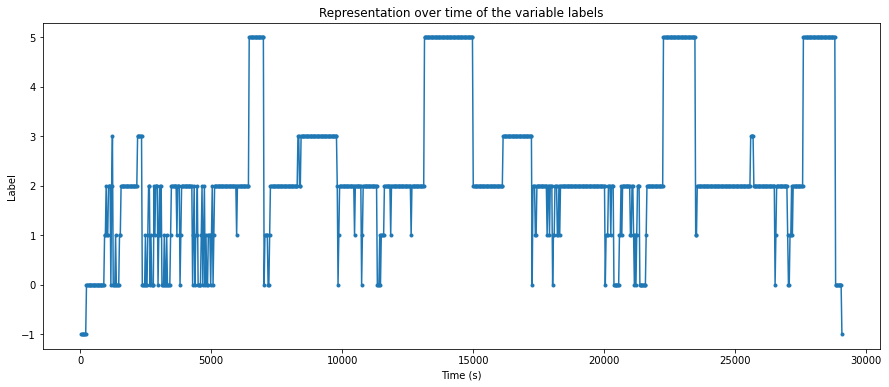

In [8]:
x=labels["Time"]
y=labels["label"]

plt.figure(figsize=(15,6))
plt.plot(x,y, marker='.')
plt.title("Representation over time of the variable labels")
plt.xlabel("Time (s)")
plt.ylabel("Label")
plt.savefig('Image/label_time.png')
plt.show()

In [35]:
#Only use heart rate information with t> 0s.
heart_rate=pd.read_csv(subject_heart_rate[n])
heart_rate.columns=["Time","hr"]
heart_rate=heart_rate[heart_rate["Time"]>0]
heart_rate.sample(10)

,Time,hr
10314,26156.89980,53.0
7920,13697.90559,66.0
6915,8430.90452,65.0
5705,2123.91173,66.0
8876,18660.90455,63.0
8396,16163.90559,57.0
10453,26871.89980,51.0
9492,21861.90207,53.0
9949,24264.89983,57.0
6055,3954.91170,64.0


The data dimension is: 5636 x 2 

Number of different values for heart rate: 43 

Statistical descriptors of heart rate:
count    5636.00
mean       61.41
std         6.65
min        49.00
25%        56.00
50%        60.00
75%        67.00
max        94.00
Name: hr, dtype: float64 

Number of Null values: 0 

Number of NaN values: 0 



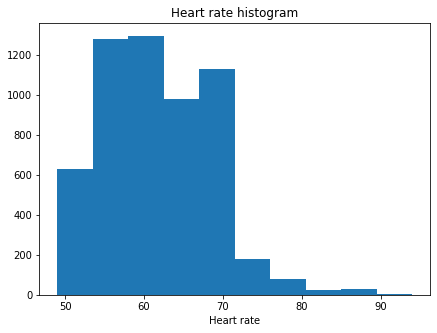

In [36]:
rows, columns = heart_rate.shape
print ('The data dimension is:', rows,'x',columns,'\n')
print('Number of different values for heart rate:', heart_rate['hr'].nunique(),'\n')
print('Statistical descriptors of heart rate:')
print(heart_rate["hr"].describe().round(2),'\n')
print('Number of Null values:', heart_rate["hr"].isnull().sum(),'\n')
print('Number of NaN values:', heart_rate["hr"].isna().sum(),'\n')

plt.figure(figsize=(7, 5))
plt.title('Heart rate histogram')
plt.xlabel("Heart rate")
plt.hist(heart_rate['hr'])
plt.savefig('Image/hr_histogram.png')
plt.show()

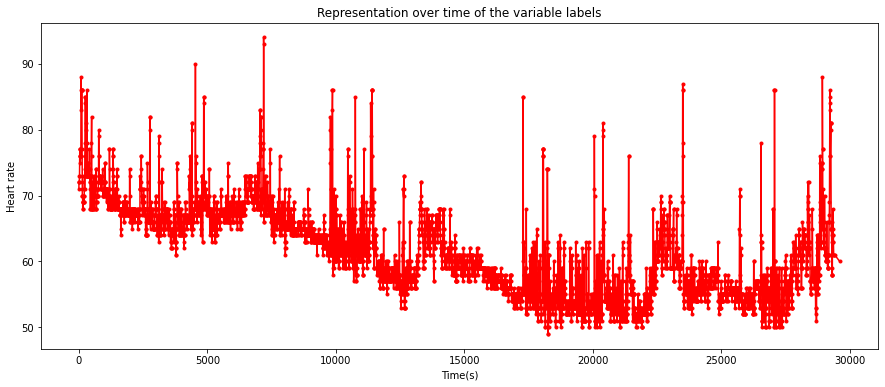

In [37]:
x=heart_rate['Time']
y=heart_rate['hr']

plt.figure(figsize=(15,6))
plt.plot(x,y, marker='.',color="r")
plt.title("Representation over time of the variable labels")
plt.xlabel("Time(s)")
plt.ylabel("Heart rate")
plt.savefig('Image/hr_time.png')
plt.show()

In [38]:
steps=pd.read_csv(subject_steps[n])
steps.columns=["Time","Step"]
steps.sample(10)

,Time,Step
899,-64728,0
432,-344928,0
153,-512328,0
862,-86928,20
1072,39072,0
336,-402528,0
166,-504528,0
259,-448728,33
56,-570528,17
457,-329928,0


In [39]:
rows, columns = steps.shape
print ('The data dimension is:', rows,'x',columns,'\n')
print('Number of Null values:',steps['Step'].isnull().sum(),'\n')
print('Number of NaN values:',steps['Step'].isna().sum(),'\n')

The data dimension is: 1091 x 2 

Number of Null values: 0 

Number of NaN values: 0 



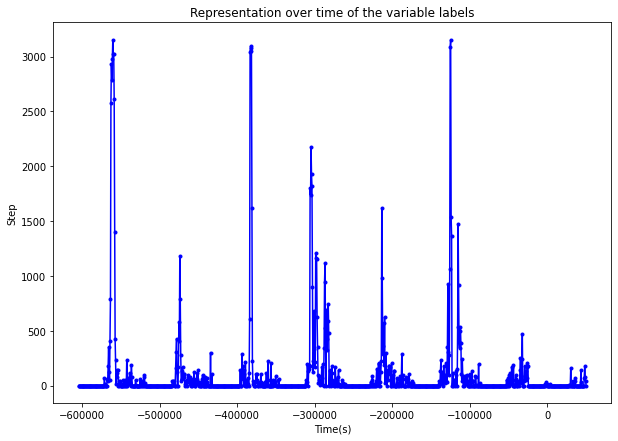

In [40]:
x=steps['Time']
y=steps['Step']

plt.figure(figsize=(10,7))
plt.plot(x,y, marker='.',color="blue")
plt.title("Representation over time of the variable labels")
plt.xlabel("Time(s)")
plt.ylabel("Step")
plt.savefig('Image/step_time.png')
plt.show()

In [41]:
#Only use acceleration information with t> 0s.
motion=pd.read_csv(subject_motion[11], delimiter=' ')
motion.columns=["Time","Ac_x","Ac_y","Ac_z"]
motion=motion[motion['Time']>0]
motion.sample(10)

,Time,Ac_x,Ac_y,Ac_z
955209,15799.895181,-0.577347,-0.669968,0.453278
1656602,28069.546224,-0.201614,-0.965546,0.136154
268521,3784.265192,-0.338791,0.287537,-0.887253
351935,5244.189051,-0.338745,0.281647,-0.890167
1454014,24527.661018,-0.141678,-0.001694,-0.986389
1289500,21650.112627,-0.137543,-0.966827,0.194336
1604381,27156.278509,-0.563766,-0.699417,0.433578
121678,1214.859055,-0.328262,0.265457,-0.898712
629886,10109.206278,-0.414963,-0.382614,-0.808746
302080,4371.600540,-0.338776,0.289978,-0.888733


The data dimension is: 1697809 x 4 

Number of different values:
Time    1697809
Ac_x      46153
Ac_y      47445
Ac_z      60458
dtype: int64 

Statistical descriptors of Motion:
             Time        Ac_x        Ac_y        Ac_z
count  1697809.00  1697809.00  1697809.00  1697809.00
mean     14852.97       -0.35       -0.22       -0.36
std       8575.23        0.17        0.47        0.66
min          0.01       -3.13       -2.88       -3.59
25%       7427.13       -0.47       -0.70       -0.89
50%      14852.83       -0.34       -0.18       -0.82
75%      22280.79       -0.29        0.28        0.46
max      29708.55        2.42        3.75        2.47 

Number of Null values:
Time    0
Ac_x    0
Ac_y    0
Ac_z    0
dtype: int64 

Number of NaN values:
Time    0
Ac_x    0
Ac_y    0
Ac_z    0
dtype: int64 



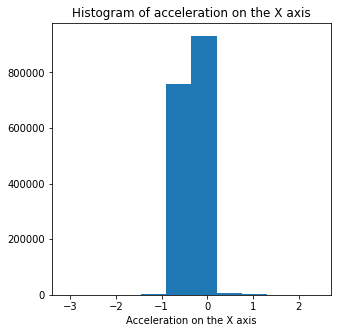

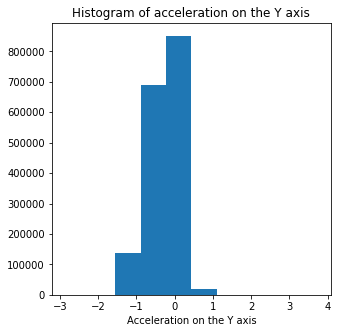

In [42]:
rows, columns = motion.shape
print ('The data dimension is:', rows,'x',columns,'\n')
print('Number of different values:')
print(motion.nunique(),'\n')
print('Statistical descriptors of Motion:')
print(motion.describe().round(2),'\n')
print('Number of Null values:')
print(motion.isnull().sum(),'\n')
print('Number of NaN values:')
print(motion.isna().sum(),'\n')

plt.figure(figsize=(5, 5))
plt.title('Histogram of acceleration on the X axis')
plt.xlabel("Acceleration on the X axis")
plt.hist(motion['Ac_x'],bins=10)
plt.savefig('Image/Ac_x_histogram.png')
plt.show()

plt.figure(figsize=(5, 5))
plt.title('Histogram of acceleration on the Y axis')
plt.xlabel("Acceleration on the Y axis")
plt.hist(motion['Ac_y'],bins=10)
plt.savefig('Image/Ac_y_histogram.png')
plt.show()

#plt.figure(figsize=(5, 5))
#plt.title('Histogram of acceleration on the Z axis')
#plt.xlabel("Acceleration on the Z axis")
#plt.hist(motion['Ac_z'],bins=10)
#plt.savefig('Image/Ac_z_histogram.png')
#plt.show()

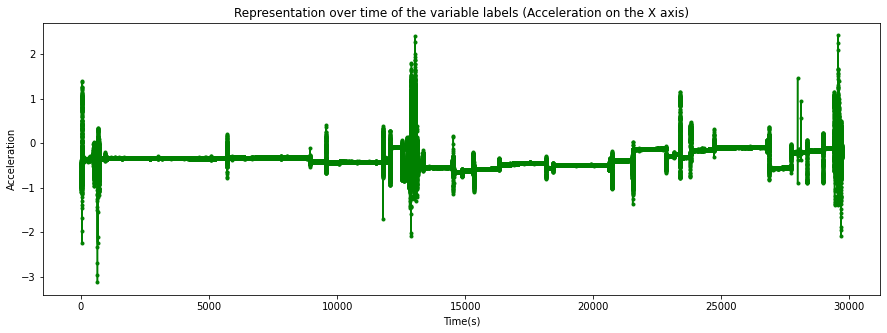

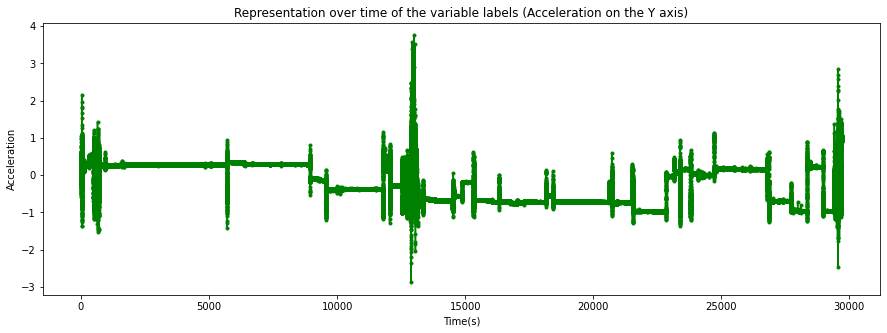

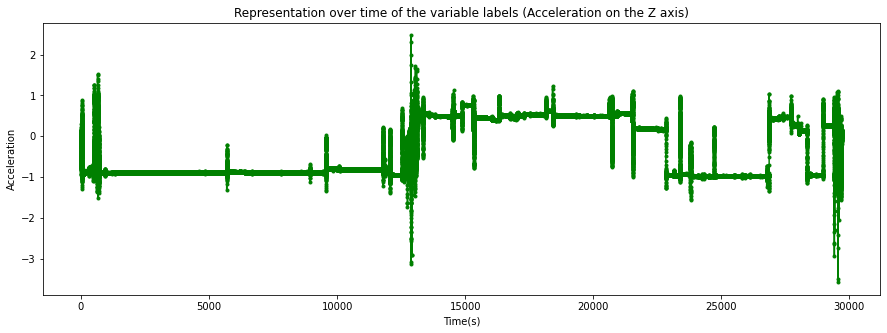

In [43]:
t=motion['Time']
x=motion['Ac_x']
y=motion['Ac_y']
z=motion['Ac_z']

plt.figure(figsize=(15,5))
plt.plot(t,x, marker='.',color="green")
plt.title("Representation over time of the variable labels (Acceleration on the X axis)")
plt.xlabel("Time(s)")
plt.ylabel("Acceleration")
plt.savefig('Image/Ac_x_time.png')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(t,y, marker='.',color="green")
plt.title("Representation over time of the variable labels (Acceleration on the Y axis)")
plt.xlabel("Time(s)")
plt.ylabel("Acceleration")
plt.savefig('Image/Ac_y_time.png')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(t,z, marker='.',color="green")
plt.title("Representation over time of the variable labels (Acceleration on the Z axis)")
plt.xlabel("Time(s)")
plt.ylabel("Acceleration")
plt.savefig('Image/Ac_z_time.png')
plt.show()